In [3]:
# Link to Kaggle Competition: https://www.kaggle.com/competitions/kaggle-llm-science-exam

In [4]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('train.csv')

In [6]:
# Combine prompt with each answer choice
combined_features = []
for index, row in data.iterrows():
    for option in ['A', 'B', 'C', 'D', 'E']:
        combined_text = row['prompt'] + ' ' + row[option]
        combined_features.append((combined_text, row['answer'] == option))


In [7]:
# Convert the list to a DataFrame
combined_df = pd.DataFrame(combined_features, columns=['text', 'is_correct'])


In [8]:
# Applying TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(combined_df['text'])
y = combined_df['is_correct']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [10]:
# Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

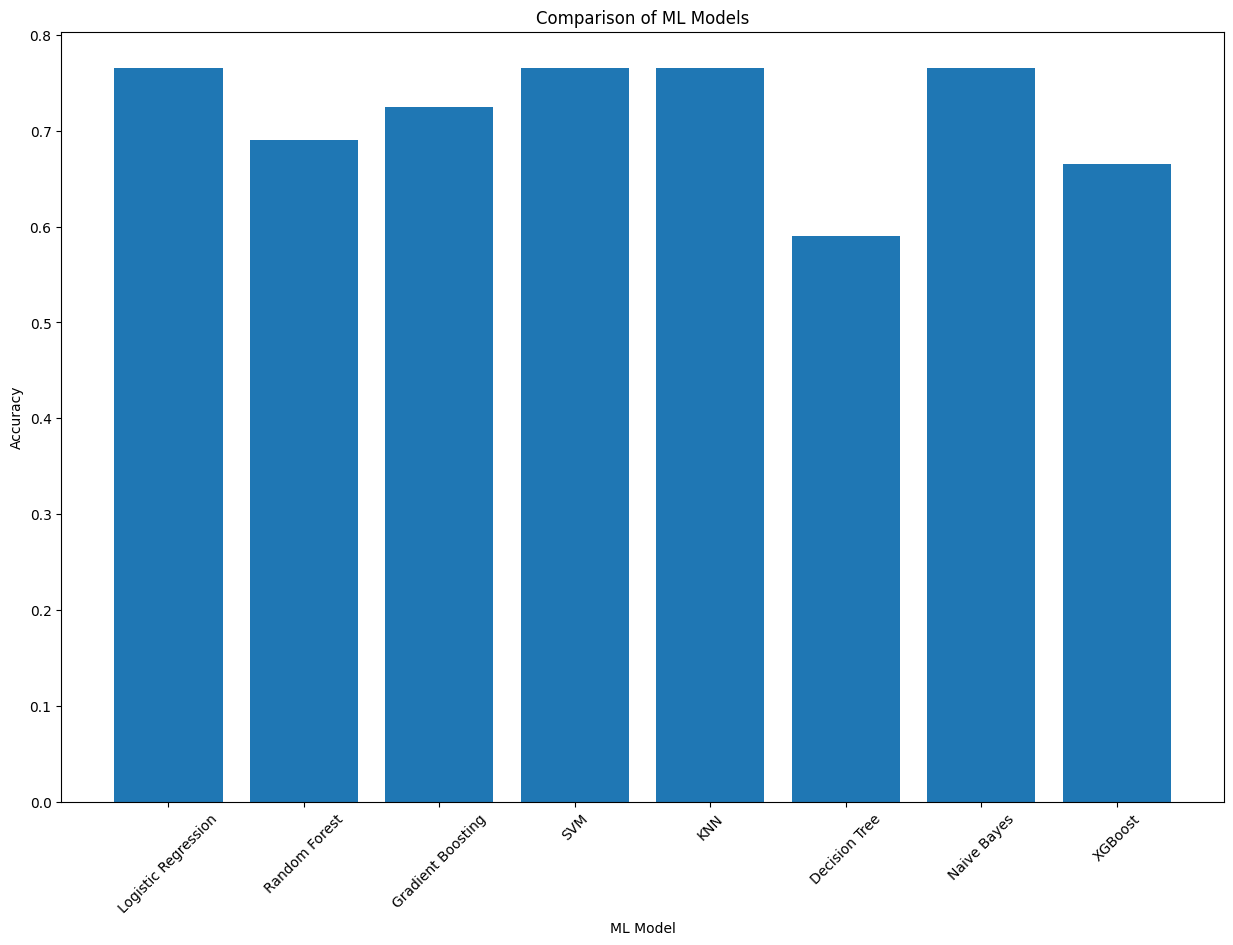

In [11]:
# Apply Models and Compare
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy

# Plot Results
labels, values = zip(*results.items())

plt.figure(figsize=(15, 10))
plt.bar(range(len(results)), values, tick_label=labels)
plt.xticks(rotation=45)
plt.xlabel('ML Model')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Models')
plt.show()

In [12]:
# Print Results Numerically
print("Model Accuracy Results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")  # Prints accuracy to four decimal places

Model Accuracy Results:
Logistic Regression: 0.7650
Random Forest: 0.6900
Gradient Boosting: 0.7250
SVM: 0.7650
KNN: 0.7650
Decision Tree: 0.5900
Naive Bayes: 0.7650
XGBoost: 0.6650


In [13]:
# Hyperparameter Tuning for SVM
parameters = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
best_svc = clf.best_estimator_

# Replace the default SVM model with the optimized one
models['SVM'] = best_svc

In [14]:
# Apply Models and Compare
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy

In [15]:
# Print Results Numerically
print("Model Accuracy Results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")  # Prints accuracy to four decimal places

Model Accuracy Results:
Logistic Regression: 0.7650
Random Forest: 0.6700
Gradient Boosting: 0.7250
SVM: 0.7650
KNN: 0.7650
Decision Tree: 0.6150
Naive Bayes: 0.7650
XGBoost: 0.6650


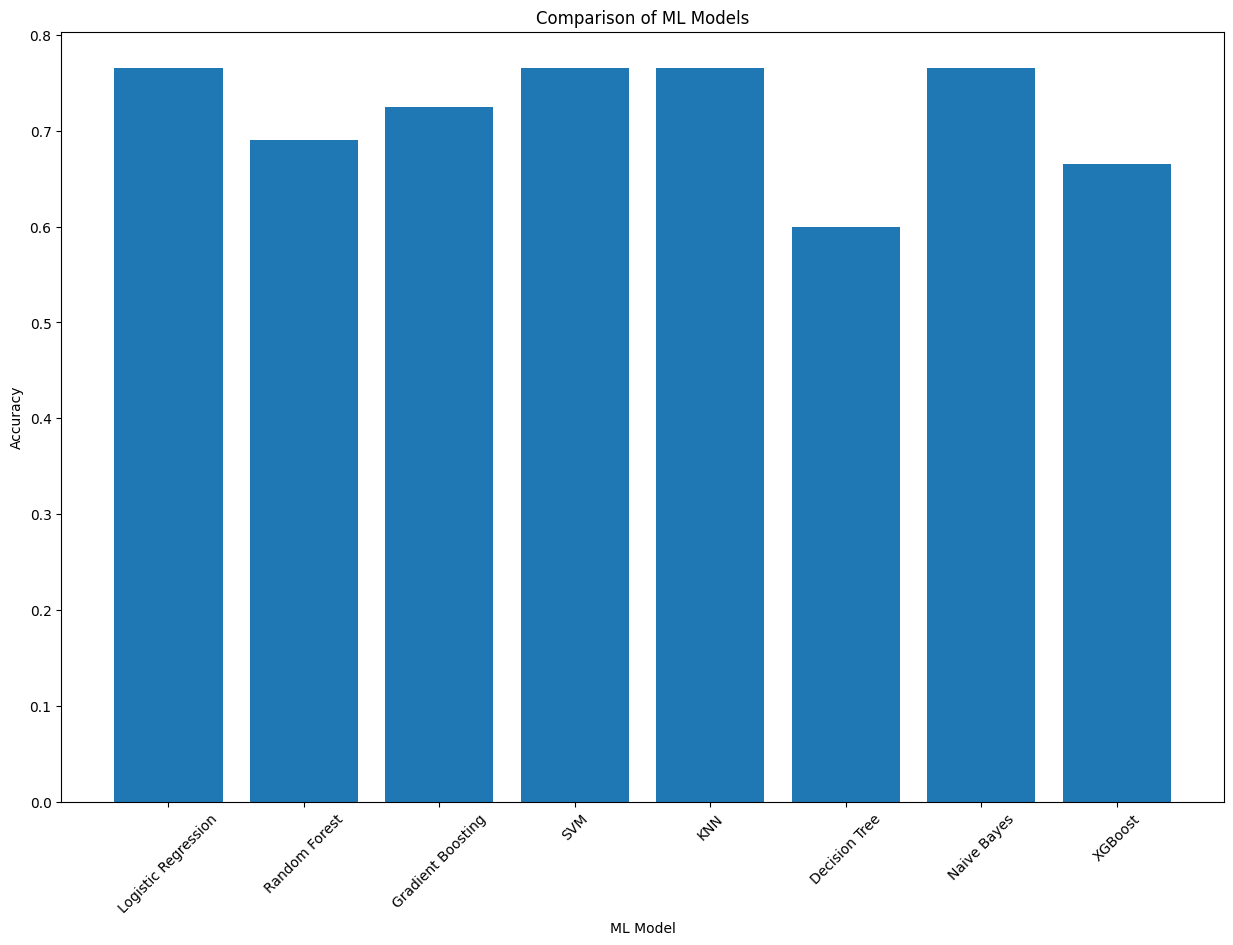

In [16]:
# Apply Models and Compare
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy

# Plot Results
labels, values = zip(*results.items())

plt.figure(figsize=(15, 10))
plt.bar(range(len(results)), values, tick_label=labels)
plt.xticks(rotation=45)
plt.xlabel('ML Model')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Models')
plt.show()